### 2-3 

1.데이터 준비 & 톺아보기
2.머신러닝 모델 training을 위한 문제지와 정답지 준비
3.머신러닝 5가지 모델 training 시키기
4.머신러닝 모델 다양하게 평가하기





1.데이터 준비 & 톺아보기 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(dir(iris))) 
# 어떤 정보가 들어있을지
print(iris.keys())

# data의 shape는 배열의 형상정보를 출력
iris_data = iris.data
print(iris_data.shape) 

# data 확인해보기
iris_data[7]
# sepal length, sepal width, petal length, petal width 

# 

<class 'list'>
(150, 4)


array([5. , 3.4, 1.5, 0.2])

머신러닝 모델이 출력해야 하는 정답을 라벨(label), 또는 타겟(target) 

In [10]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 라벨의 이름은 다음과 같이 target_names에서 확인할 수 있습니다.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# 나머지 변수들 확인
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
# feature_names에는 다음과 같이 4개의 각 feature에 대한 설명
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# filename에는 데이터셋 파일이 저장된 경로
iris.filename

'/home/aiffel/Downloads/yes/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

pandas를 들어보셨나요?
판다스라고 불리는 이 라이브러리는 파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구입니다. 표 데이터를 활용해서 데이터 분석을 하기도 하고, 또는 대형 데이터의 여러 통계량을 다루기에도 최적화가 되어있죠.

iris 데이터 또한 행과 열이 있는 2차원 데이터이므로 우리도 pandas를 활용해서 다뤄볼 것입니다. 

In [18]:
import pandas as pd

print(pd.__version__)

# 꽃 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df
# 0 : setosa, 1 : versicolor, 2 : virginica

1.1.5


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# 정답 데이터도 함께 있다면 데이터를 다루기 더 편리하겠죠. label이라는 컬럼을 추가
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


    문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.
    정답지 : 머신러닝 모델이 맞추어야 하는 데이터. label, 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

머신러닝 모델을 학습시키려면 한 가지 장치가 필요합니다.
바로 학습에 사용하는 training dataset과 모델의 성능을 평가하는 데 사용하는 test dataset으로 데이터셋을 나누는 작업  
데이터셋을 분리하는 것은 scikit-learn이 제공하는 train_test_split 이라는 함수로 간단하게 할 수 있습니다. 

In [20]:
# sklearn.model_selection 패키지의 train_test_split을 활용
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


마지막으로 쓰인 random_state는 train데이터와 test데이터를 분리(split)하는데 적용되는 랜덤성을 결정합니다. 위에서 데이터를 출력했을때 라벨이 0부터 순서대로 정렬된 것을 보셨을 겁니다.

만약 이 데이터 그대로 학습용 데이터와 테스트용 데이터를 나눈다면 뒤쪽의 20%가 테스트용 데이터셋으로 만들어지기 때문에 테스트용 데이터셋은 라벨이 2인 데이터로만 구성됩니다.

이런 데이터셋을 테스트용으로 사용한다면 학습이 제대로 되었는지 확인할수가 없겠죠? 그래서 데이터를 분리할 때 랜덤으로 섞는 과정이 필요하고 random_state가 이 역할을 하게되는 것이죠.

컴퓨터에서의 랜덤은 아무리 랜덤이라고 해도 특정 로직에 따라 결정되는 랜덤이기 때문에 완벽한 랜덤이라고 할 수 없습니다.
그러한 랜덤을 조절할 수 있는 값이 바로 random_state, 또는 random_seed입니다. 이 값이 같다면 코드는 항상 같은 랜덤 결과를 나타냅니다.
랜덤인데 왜 같은 결과를 원하냐구요? 내가 실험한 결과를 다른 사람의 컴퓨터에서도 재현가능(reproducible) 하게 하려면 같은 랜덤시드가 필요할 때가 있답니다.
랜덤성을 조절하고 싶지 않다면, 해당 인자는 없어도 코드상의 문제는 없습니다.

In [24]:
# X_train부터 y_test까지 만들어진 데이터셋을 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# y가 무작위로 섞인 것을 확인
y_train, y_test

(120, 4) (120,)
(30, 4) (30,)


(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

지도학습은 지도받을 수 있는, 즉 정답이 있는 문제에 대해 학습하는 것을 말하고, 반대로 비지도학습은 정답이 없는 문제를 학습하는 것을 말합니다.  
회귀 문제는 예를 들어, 집에 대한 정보(평수, 위치, 층수 등)를 입력받아 그 집의 가격을 맞추는 문제에 해당합니다.
카테고리를 분류하는 것이 아니라, 실제 값의 수치를 어림해서 맞추는 거죠.  

    첫 번째, 머신러닝 중 정답이 있고 그 정답을 맞추기 위해 학습하는 지도 학습(Supervised Learning)이며,
    지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞추는 분류(Classification) 문제

라고 할 수 있겠습니다.

그러면 여기까지 정리가 되었으니 우리는 무슨 머신러닝 모델을 써야할지 명확해집니다. 지도학습 중에서도 분류를 할 수 있는 모델을 사용하면 되죠.  

그 중 하나가 decision tree  
Decision Tree는 sklearn.tree 패키지 안에 DecisionTreeClassifier 라는 이름으로 내장되어 있습니다.
모델을 import해서 가져오고, decision_tree 라는 변수에 모델을 저장해 보겠습니다.

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [26]:
# 모델은 어떻게 학습시킬까요?
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

메서드의 이름이 fit  
training dataset 으로 모델을 학습시킨다는 것은, 달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있습니다.  
training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문입니다.

즉, 다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못합니다.
다만 training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이죠.

그렇기 때문에 새로운 데이터에 대해서도 잘 맞출 수 있기 위해서는 training dataset이 어떻게 구성되어 있는지가 매우 중요합니다.

In [27]:
# 학습을 완료했으니, 테스트를 해보자
y_pred = decision_tree.predict(X_test)
print(y_pred)
print(y_test)

[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


예측한 결과에 대한 수치를 조금 더 편리하게 확인할 수 있는 방법이 있습니다.
scikit-learn에서 성능 평가에 대한 함수들이 모여있는 sklearn.metrics 패키지를 이용하면 되죠.

성능을 평가하는 방법에도 다양한 척도가 있는데, 그 중 일단 정확도(Accuracy)를 간단히 확인해 보겠습니다.

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

## 머신러닝과 분류에 특화된 model 5가지 돌려보기

In [3]:
# 1.Decision tree 정리
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [4]:
# 2.Random Forest
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [8]:
# 2-7. 3.SVM(Support Vector Machine)

from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(svm_model._estimator_type)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# 4.Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(sgd_model._estimator_type)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.59      1.00      0.74        13
           2       0.00      0.00      0.00         8

    accuracy                           0.70        30
   macro avg       0.53      0.63      0.56        30
weighted avg       0.56      0.70      0.60        30



/home/aiffel/Downloads/yes/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# 5.Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(logistic_model._estimator_type)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/aiffel/Downloads/yes/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 다양하게 평가해보기
MNIST로 평가를 다양하게 해보자

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

digits_data = digits.data
print(digits_data.shape)

digits_data[7]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

data는 총 1797개이고 64개의 숫자로 이뤄져 있고,  
8번째 데이터를 확인해봤더니,  
길이 64의 숫자 배열은 사실 (8 x 8) 크기의 이미지를 일렬로 쭉 펴놓은 것입니다.
이미지는 어떻게 생겼는지 한 번 확인해 보겠습니다. 이미지를 보기 위해서는 matplotlib이라는 라이브러리가 필요합니다.

matplotlib.pyplot을 plt라는 이름으로 가져오고, 이미지를 현재 화면에 보여주기 위해 %matplotlib inline이라는 코드를 추가하겠습니다.

이미지는 다음과 같이 간단히 확인할 수 있습니다. 다만, 일렬로 펴진 64개 데이터를 (8, 8)로 reshape해주는 것을 잊으면 안 됩니다!

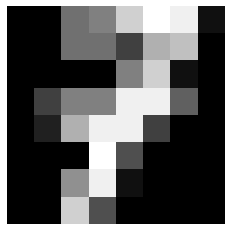

(1797,)


7

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[7].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

# target data?
digits_label = digits.target
print(digits_label.shape)
digits_label[7]

이번에는 정확도의 함정을 확인하기 위한 실험이었기 때문에 약간의 장치를 넣어볼 것입니다.

바로, 숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞추는 문제로 변형해서 풀어보는 것입니다.
즉, 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보겠습니다.

그러려면, 우리는 target인 digits_label을 살짝 변형할 필요가 있습니다.

In [8]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [20]:
# Decision tree 학습
# train_test_split으로 학습 데이터와 테스트 데이터를 만든 후, 
# 모델을 fit 시키고, predict를 통해 예측 결과를 만든 후 accuracy_score를 이용해 정확도를 측정하는 순서로 진행
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target
    
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label,     # 
                                                    test_size=0.1, 
                                                    random_state=15)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(y_test)
print(y_pred)

# (5) accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       166
           3       0.73      0.57      0.64        14

    accuracy                           0.95       180
   macro avg       0.85      0.78      0.81       180
weighted avg       0.95      0.95      0.95       180

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 

0.95

모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것입니다.
실제로 확인해 보죠.

길이는 y_pred와 같으면서 0으로만 이루어진 리스트를 fake_pred 라는 변수로 저장해 보고, 이 리스트와 실제 정답인 y_test간의 정확도를 확인해 보겠습니다.

In [21]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.9222222222222223

학습시킬 필요가 없이 0만 나열된 정답지로 accuracy를 확인했더니 정확도가 90%가 넘게 나왔다.
이런 문제는 불균형한 데이터, unbalanced 데이터에서 많이 발생할 수 있습니다.

즉, 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있는 것이죠.

그렇기 때문에 분류 문제에서는 정확도 외에 다양한 평가 척도를 사용합니다. 무엇이 있는지 알아보도록 하겠습니다.

### 2-9. 오차 행렬(Confusion matrix)

TN(True Negative), FP(False Positive), FN(False Negative), TP(True Positive)
이러한 TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score)입니다.

정밀도(Precision)은 음성인데 양성으로 판단하는 경우가 적어야 합니다.
재현율(Recall)은 양성인데 음성으로 판단하는 경우가 적어야 합니다.

마지막으로 F1 score은 Recall과 Precision의 조화평균입니다. Accuracy는 앞서 설명했듯 전체 데이터 중 올바르게 판단한 데이터 개수의 비율이죠.

In [23]:
# 왼쪽 위부터 순서대로 [TP, FN, 
#                      FP, TN]
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, fake_pred))

[[163   3]
 [  6   8]]
[[166   0]
 [ 14   0]]


Precision, Recall, f1 score는 각각 얼마가 되는지 확인
sklearn.metrics의 classification_report를 활용하면 각 지표를 한 번에 확인할 수 있습니다.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       166
           3       0.73      0.57      0.64        14

    accuracy                           0.95       180
   macro avg       0.85      0.78      0.81       180
weighted avg       0.95      0.95      0.95       180

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       166
           3       0.00      0.00      0.00        14

    accuracy                           0.92       180
   macro avg       0.46      0.50      0.48       180
weighted avg       0.85      0.92      0.88       180



/home/aiffel/Downloads/yes/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.95, 0.9222222222222223)